In [ ]:
#pip install opencv-python

# object detection using ssd mobilenet

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels=[]
file_name='labels.TXT'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
 print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000254CF561270>

In [8]:
img=cv2.imread('car with persons.jpg')

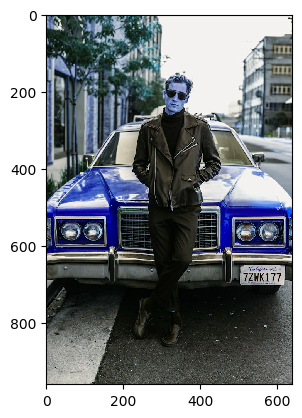

In [9]:
plt.imshow(img)

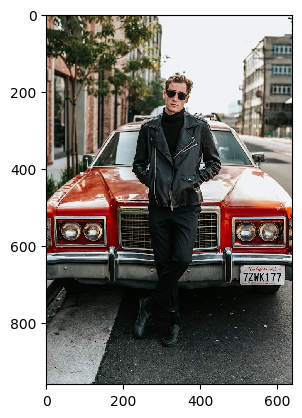

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)
                     

In [12]:
print(ClassIndex)

[1 8 3]


In [13]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,0,255),thickness=1)

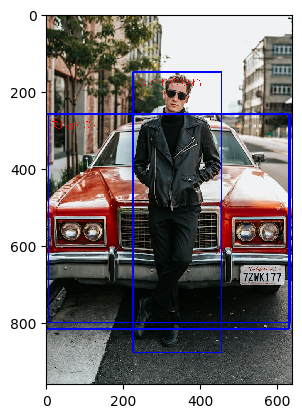

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# VIDEO DEMO

In [15]:
# VIDEO DEMO

import cv2

cap = cv2.VideoCapture("person-bicycle-car-detection(1) (online-video-cutter.com).mp4")

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # If not opened, try capturing from the default camera (index 0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    try:
        ret, frame = cap.read()

        if not ret:
            print("End of video. Exiting...")
            break

        ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

        print(ClassIndex)
        if len(ClassIndex) != 0:
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 80:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=1)

        cv2.imshow('Object Detection Tutorial', frame)  # Display the frame
        if cv2.waitKey(30)&0xFF == ord('q'):
            break

    except Exception as e:
        print("An error occurred:", e)
        break

cap.release()  # Release the video capture object
cv2.destroyAllWindows()  # Close all OpenCV windows




()
()
()
[1]
[1]
[1]
[1]
[1]
[1 3]
()
[1]
[3]
[3 1]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[6 3]
[3]
[1 3]
[1 3]
[1]
[3 1]
[3 6]
[3]
[3]
End of video. Exiting...
